# Exercise 1

### 1 A Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of
### points for which 1 + 3X1 − X2 > 0, as well as the set of points
### for which 1 + 3X1 − X2 < 0.
### On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0.
### Indicate the set of points for which −2+ X1 +2X2 > 0, as well
### as the set of points for which −2+ X1 + 2X2 < 0.

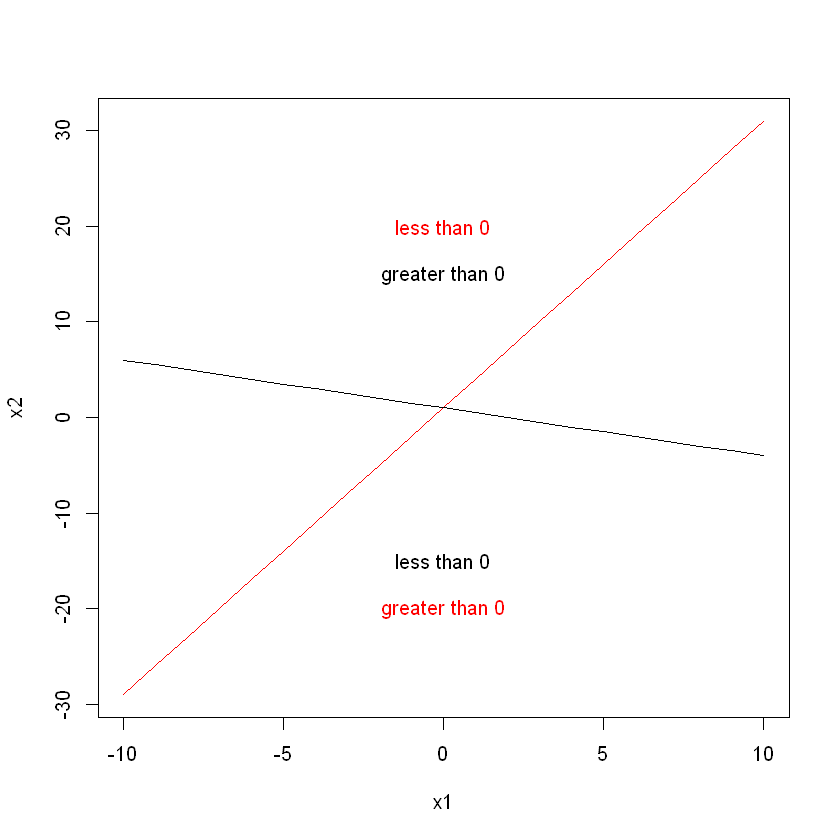

In [1]:
x1 = -10:10
x2 = 1 + 3 * x1
plot(x1, x2, type = "l", col = "red")
text(c(0), c(-20), "greater than 0", col = "red")
text(c(0), c(20), "less than 0", col = "red")
#part b
lines(x1, 1 - x1/2) 
text(c(0), c(-15), "less than 0")
text(c(0), c(15), "greater than 0")

### Exercise 2 We have seen that in p = 2 dimensions, a linear decision boundary
### takes the form β0+β1X1+β2X2 = 0.We now investigate a non-linear
### decision boundary.
### (a) Sketch the curve

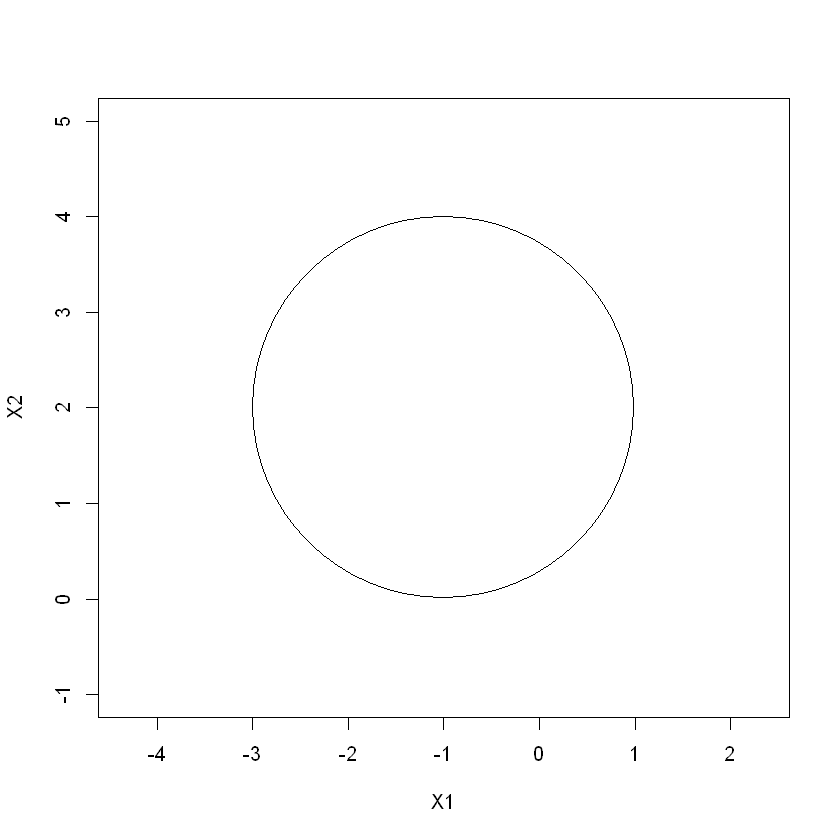

In [2]:
radius = 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)

(b) On your sketch, indicate the set of points for which
(1 + X1)2 + (2 − X2)2 > 4,
as well as the set of points for which
(1 + X1)2 + (2 − X2)2 ≤ 4.

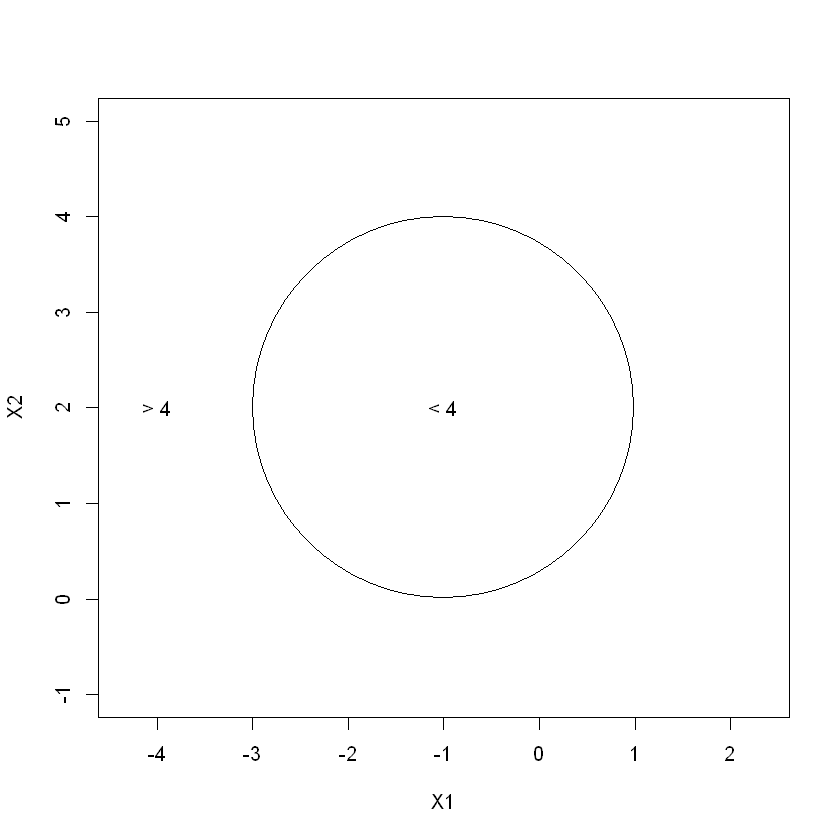

In [3]:
radius = 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

c) Suppose that a classifier assigns an observation to the blue class
if
(1 + X1)2 + (2 − X2)2 > 4,
and to the red class otherwise. To what class is the observation
(0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?

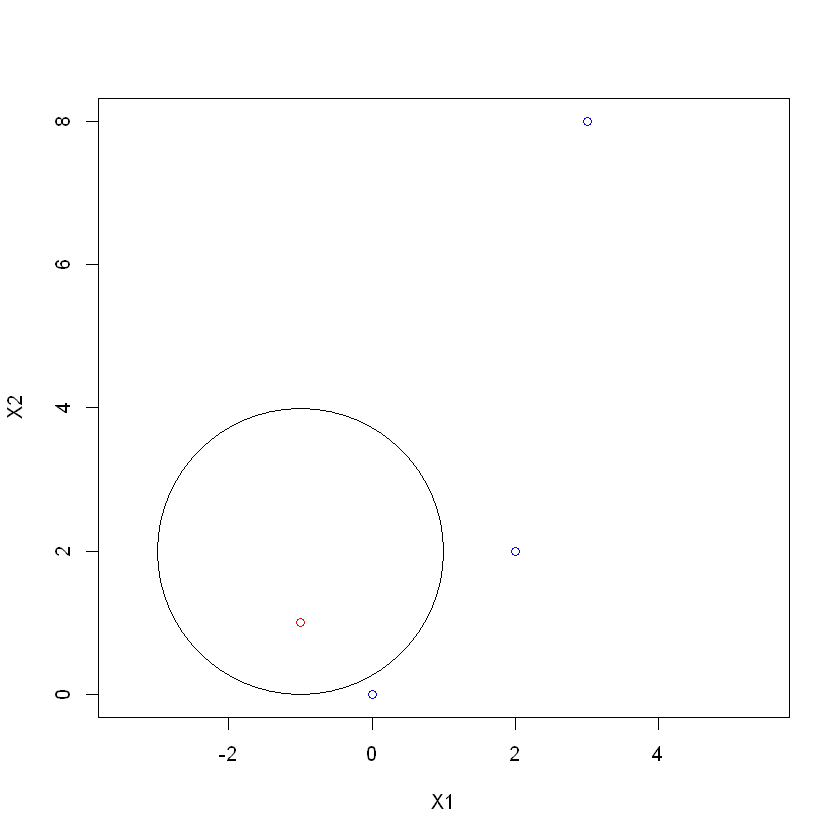

In [4]:
radius = 2
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)

d) Argue that while the decision boundary in (c) is not linear in
terms of X1 and X2, it is linear in terms of X1, X2
1 , X2, and
X2
2 .

They are quadratic values in the terms above.

# Exercise 4


Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between
the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the training
data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.

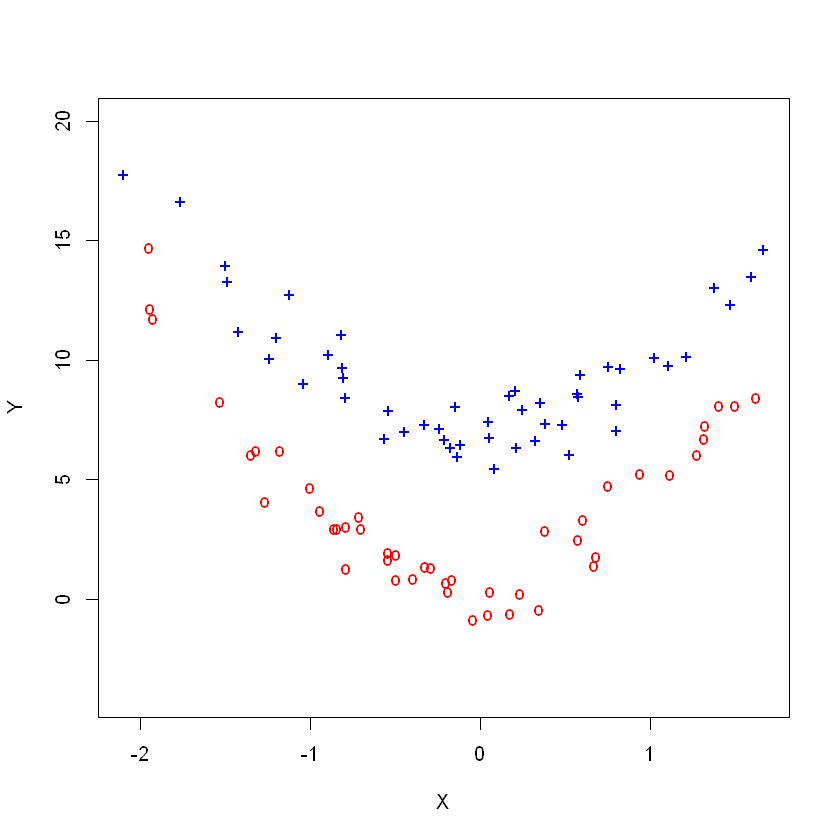

In [6]:
#creating two class data set
set.seed(131)
x = rnorm(100)
y = 3 * x^2 + 4 + rnorm(100)
train = sample(100, 50)
y[train] = y[train] + 3
y[-train] = y[-train] - 3
# Plot using different colors
plot(x[train], y[train], pch="+", lwd=4, col="blue", ylim=c(-4, 20), xlab="X", ylab="Y")
points(x[-train], y[-train], pch="o", lwd=4, col="red")

In [7]:
#training and testing
set.seed(315)
z = rep(0, 100)
z[train] = 1
# Take 25 observations each from train and -train
final.train = c(sample(train, 25), sample(setdiff(1:100, train), 25))
data.train = data.frame(x=x[final.train], y=y[final.train], z=as.factor(z[final.train]))
data.test = data.frame(x=x[-final.train], y=y[-final.train], z=as.factor(z[-final.train]))

also installing the dependencies 'MASS', 'class', 'proxy'




  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-4  1.7-5              TRUE

  Binaries will be installed
package 'MASS' successfully unpacked and MD5 sums checked
package 'class' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tholl\AppData\Local\Temp\RtmpaiFhqq\downloaded_packages


Warning message:
"package 'e1071' was built under R version 3.6.3"

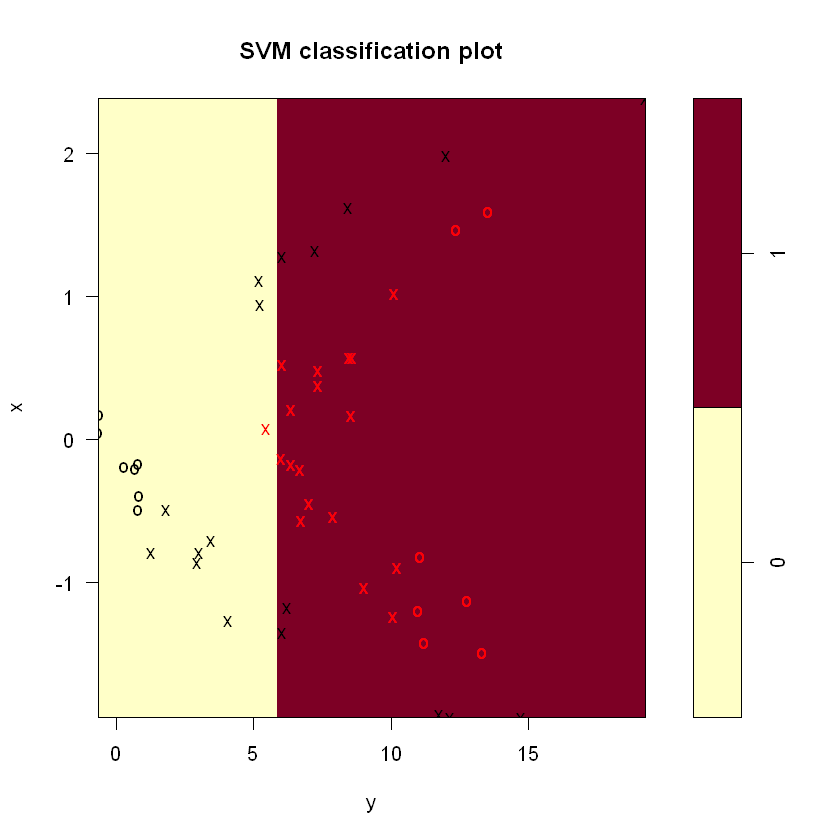

In [12]:
#plotting svm
install.packages('e1071')
library('e1071')
svm.linear = svm(z~., data=data.train, kernel="linear", cost=10)
plot(svm.linear, data.train)

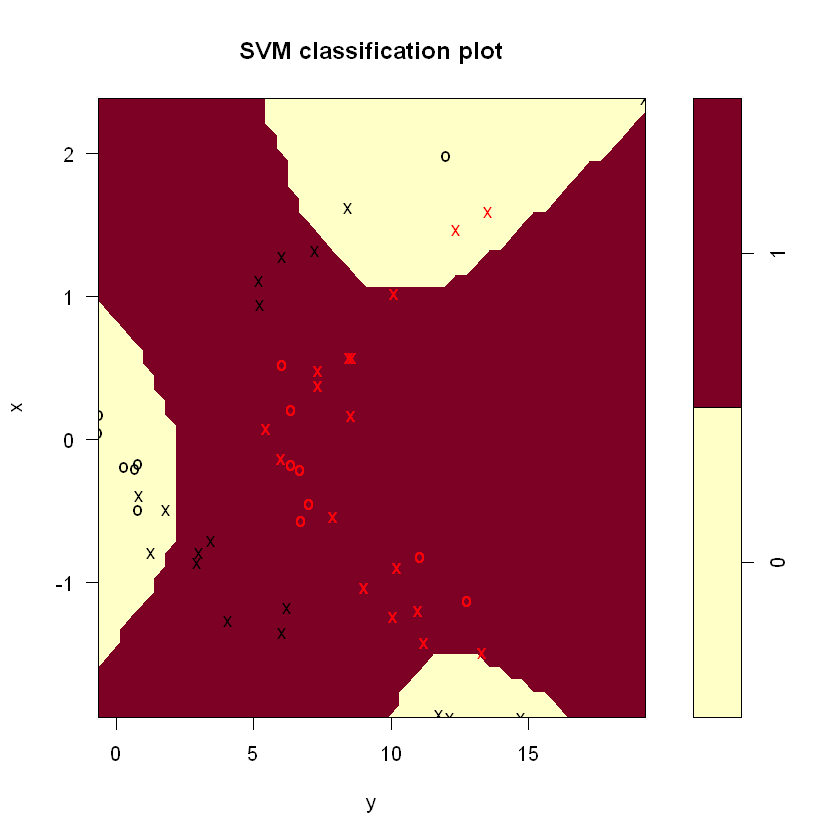

In [13]:
#training with polynomial
set.seed(32545)
svm.poly = svm(z~., data=data.train, kernel="polynomial", cost=10)
plot(svm.poly, data.train)

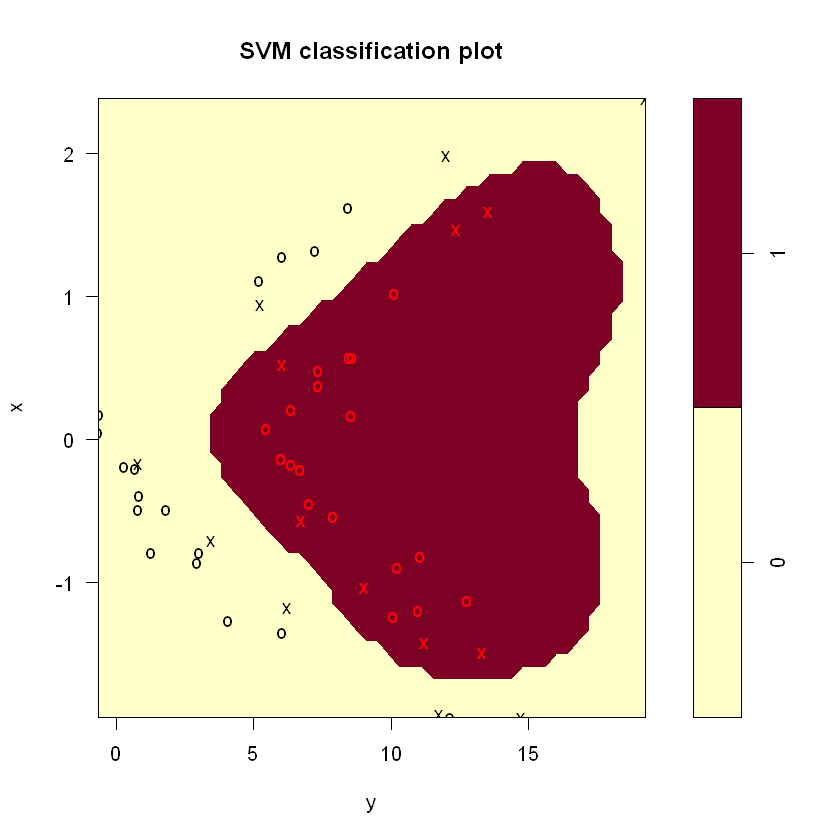

In [14]:
#svm with radial
set.seed(996)
svm.radial = svm(z~., data=data.train, kernel="radial", gamma=1, cost=10)
plot(svm.radial, data.train)

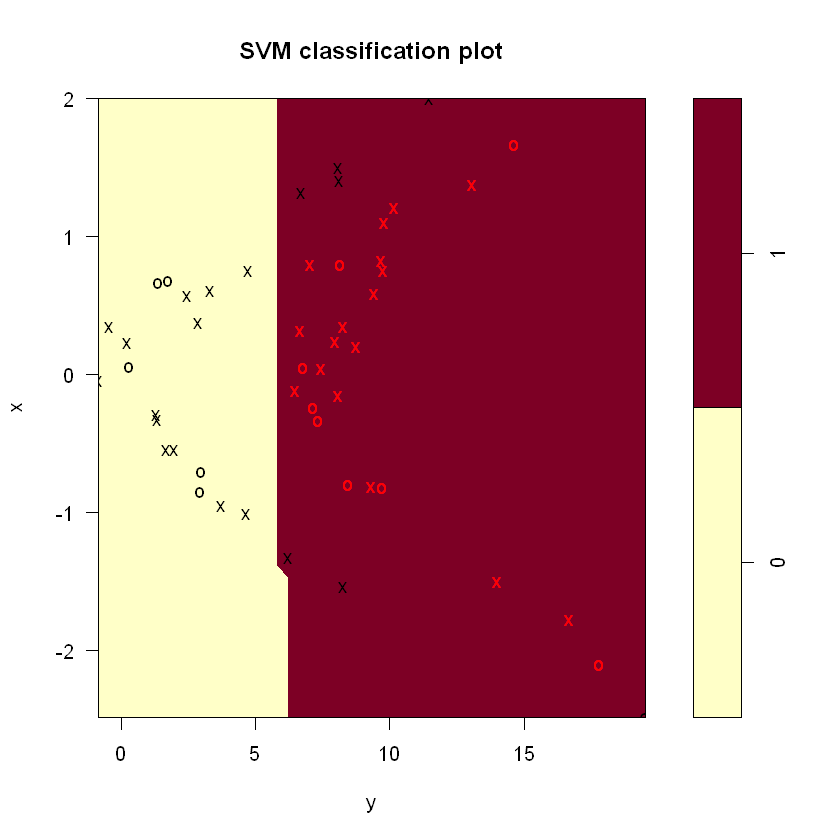

In [15]:
# linear test
plot(svm.linear, data.test)

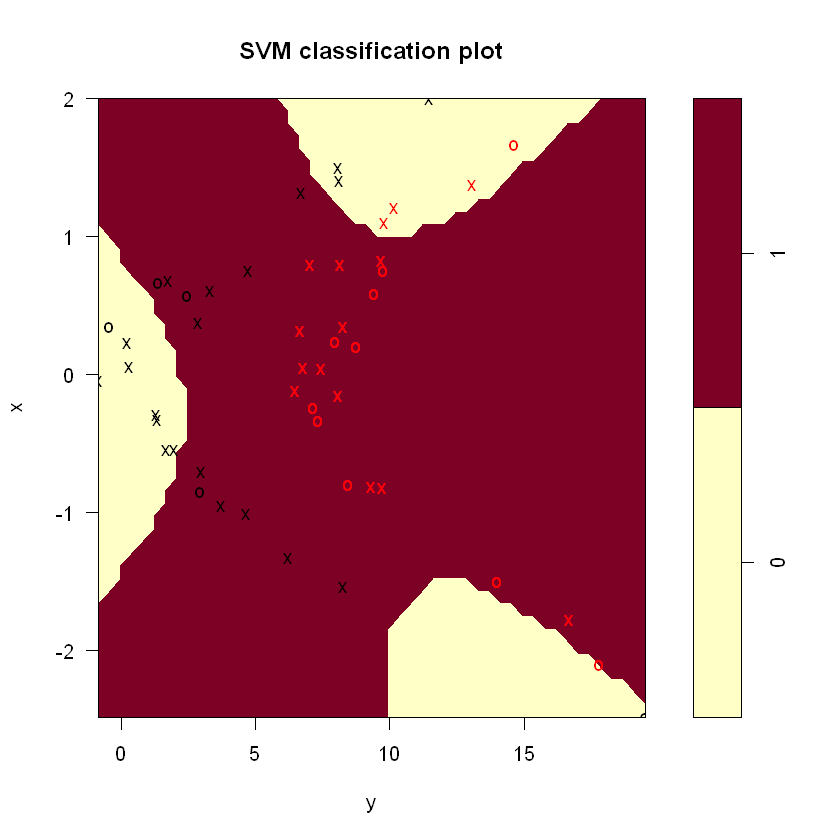

In [16]:
#polynomial test
plot(svm.poly, data.test)

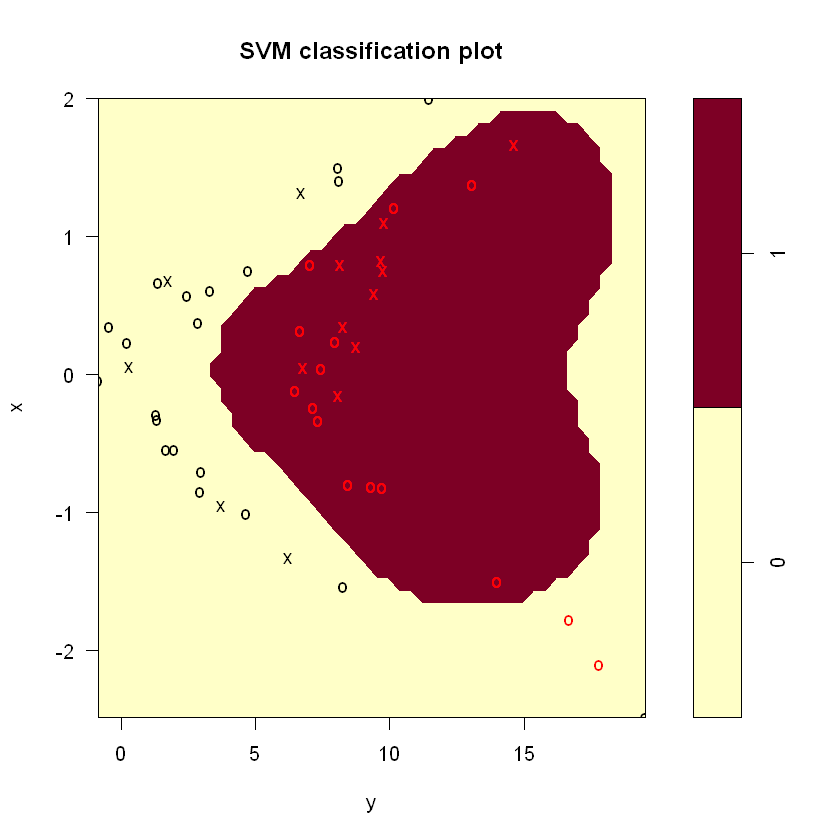

In [17]:
#radial test
plot(svm.radial, data.test)

In [19]:
#prediction tables for each type 
table(z[-final.train], predict(svm.linear, data.test))
table(z[-final.train], predict(svm.poly, data.test))
table(z[-final.train], predict(svm.radial, data.test))

   
     0  1
  0 18  7
  1  0 25

   
     0  1
  0 12 13
  1  4 21

   
     0  1
  0 25  0
  1  2 23

# Exercise 7 

In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.
(a) Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median.

In [20]:
library('ISLR')
gas.med = median(Auto$mpg)
new.var = ifelse(Auto$mpg > gas.med, 1, 0)
Auto$mpglevel = as.factor(new.var)

Warning message:
"package 'ISLR' was built under R version 3.6.3"

In [21]:
#B Fit a support vector classifier to the data with various values
#of cost, in order to predict whether a car gets high or low gas
#mileage. Report the cross-validation errors associated with different
#values of this parameter. Comment on your results.

set.seed(3255)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 
    0.1, 1, 5, 10, 100)))
summary(tune.out)
#ourbest cost parameter is 1


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01269231 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07397436 0.06863413
2 1e-01 0.05102564 0.06923024
3 1e+00 0.01269231 0.02154160
4 5e+00 0.01519231 0.01760469
5 1e+01 0.02025641 0.02303772
6 1e+02 0.03294872 0.02898463


In [24]:
#(c) Now repeat (b), this time using SVMs with radial and polynomial
#basis kernels, with different values of gamma and degree and
#cost. Comment on your results.

set.seed(21)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.1, 
    1, 5, 10), degree = c(2, 3, 4)))
summary(tune.out)

#best cost is 10 and degree is 2 for cross validation


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
   10      2

- best performance: 0.5435897 

- Detailed performance results:
   cost degree     error dispersion
1   0.1      2 0.5587821 0.04538579
2   1.0      2 0.5587821 0.04538579
3   5.0      2 0.5587821 0.04538579
4  10.0      2 0.5435897 0.05611162
5   0.1      3 0.5587821 0.04538579
6   1.0      3 0.5587821 0.04538579
7   5.0      3 0.5587821 0.04538579
8  10.0      3 0.5587821 0.04538579
9   0.1      4 0.5587821 0.04538579
10  1.0      4 0.5587821 0.04538579
11  5.0      4 0.5587821 0.04538579
12 10.0      4 0.5587821 0.04538579


In [25]:
#for radial
set.seed(463)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.1, 
    1, 5, 10), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)
#cost is 10 and gamma is .01


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10  0.01

- best performance: 0.02551282 

- Detailed performance results:
   cost gamma      error dispersion
1   0.1 1e-02 0.09429487 0.04814900
2   1.0 1e-02 0.07897436 0.03875105
3   5.0 1e-02 0.05352564 0.02532795
4  10.0 1e-02 0.02551282 0.02417610
5   0.1 1e-01 0.07891026 0.03847631
6   1.0 1e-01 0.05602564 0.02881876
7   5.0 1e-01 0.03826923 0.03252085
8  10.0 1e-01 0.03320513 0.02964746
9   0.1 1e+00 0.57660256 0.05479863
10  1.0 1e+00 0.06628205 0.02996211
11  5.0 1e+00 0.06115385 0.02733573
12 10.0 1e+00 0.06115385 0.02733573
13  0.1 5e+00 0.57660256 0.05479863
14  1.0 5e+00 0.51538462 0.06642516
15  5.0 5e+00 0.50775641 0.07152757
16 10.0 5e+00 0.50775641 0.07152757
17  0.1 1e+01 0.57660256 0.05479863
18  1.0 1e+01 0.53833333 0.05640443
19  5.0 1e+01 0.53070513 0.05708644
20 10.0 1e+01 0.53070513 0.05708644
21  0.1 1e+02 0.57660256 0.05479863
22  1.0 1e+02 0.57660256

D) Make some plots to back up your assertions in (b) and (c).

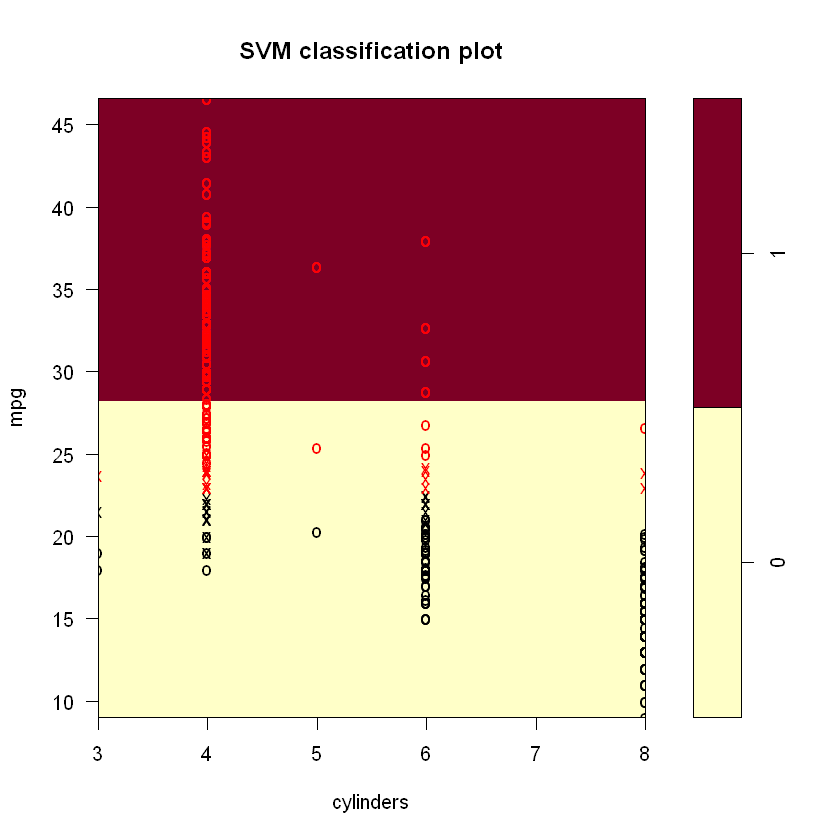

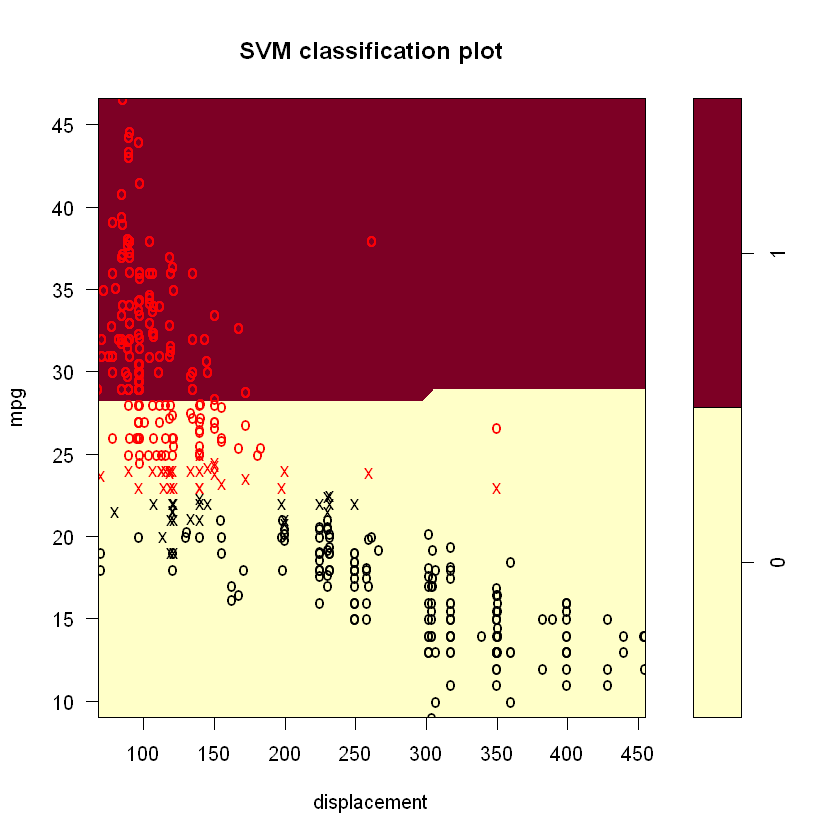

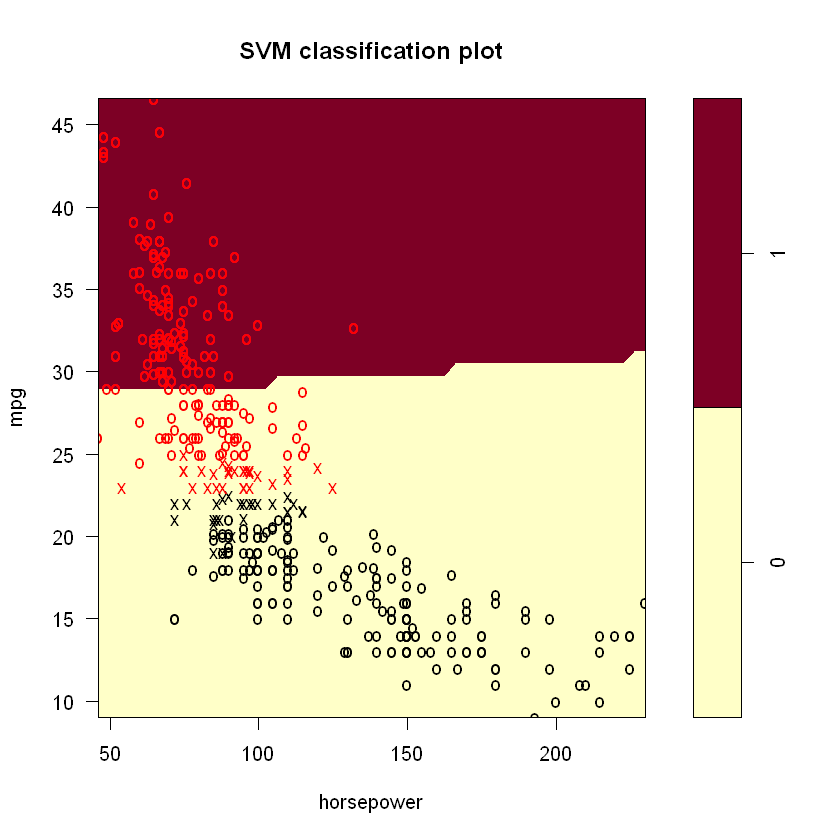

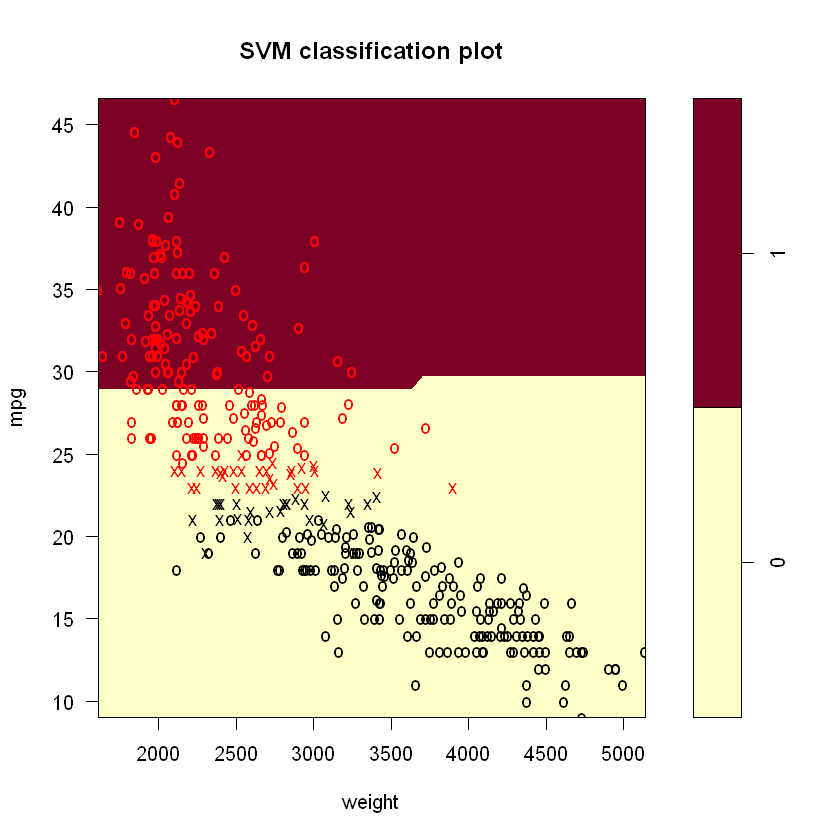

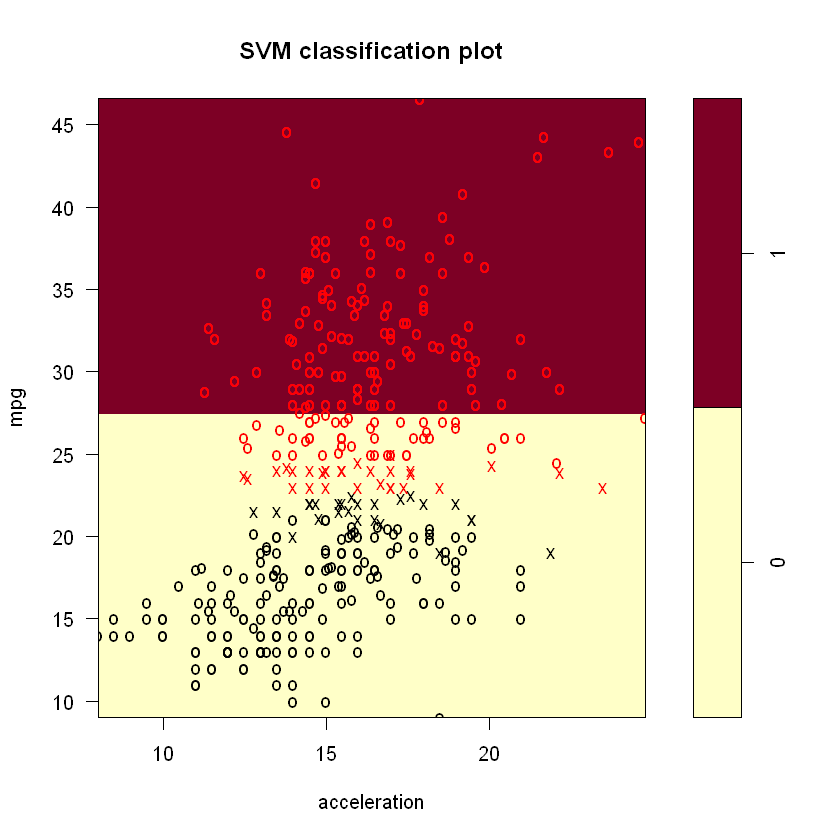

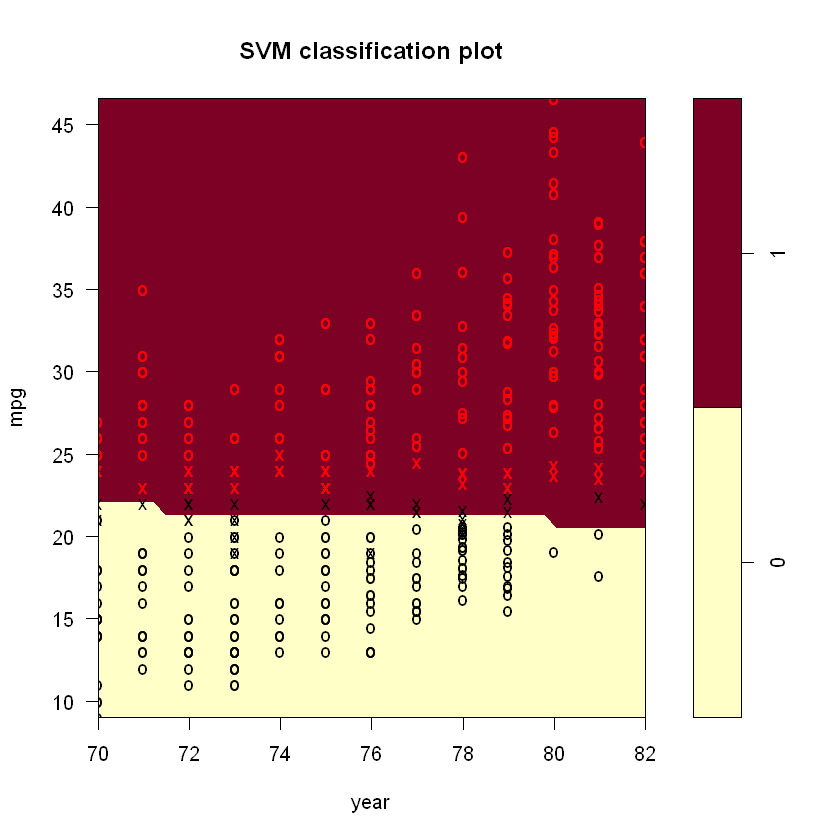

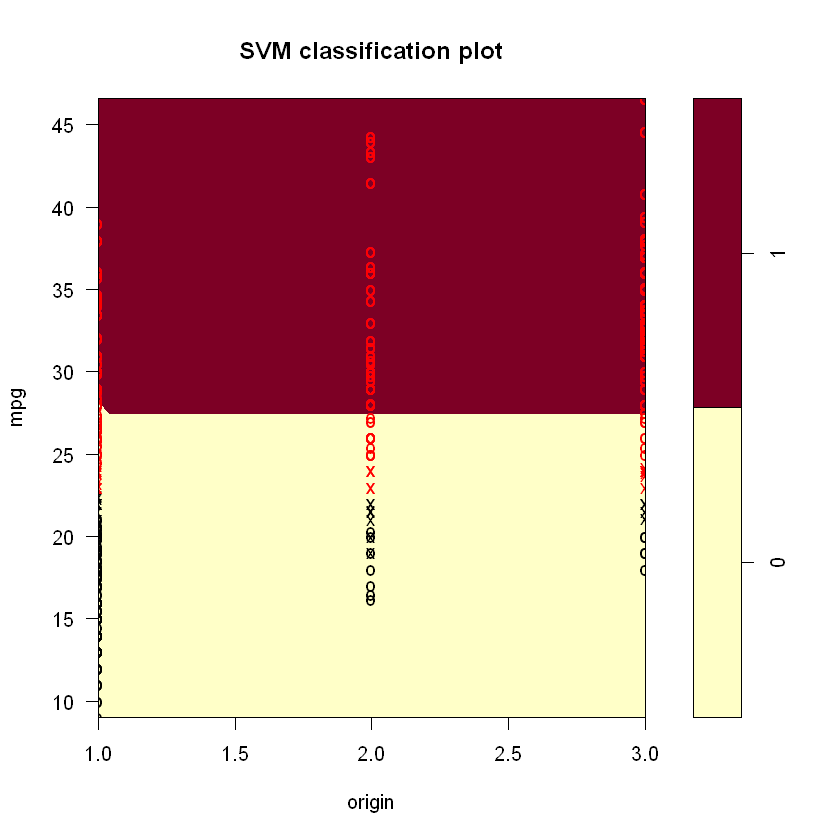

In [26]:
svm.linear = svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly = svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 10, 
    degree = 2)
svm.radial = svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 10, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

# Exercise 8

(a) Create a training set containing a random sample of 800
observations, and a test set containing the remaining
observations.

In [27]:
set.seed(9004)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

(b) Fit a support vector classifier to the training data using
cost=0.01, with Purchase as the response and the other variables
as predictors. Use the summary() function to produce summary
statistics, and describe the results obtained.

In [28]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)
summary(svm.linear)
#442 support vecotrs and 2 classes


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  442

 ( 222 220 )


Number of Classes:  2 

Levels: 
 CH MM




(c) What are the training and test error rates?

In [29]:
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 432  51
  MM  80 237

In [39]:
#training
(80 + 51)/(432 + 51 + 80 + 237)

[1] 0.16375

In [30]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 146  24
  MM  22  78

In [38]:
#testing 
(24 + 22)/(146 + 24 + 22 + 78)

[1] 0.1703704

(d) Use the tune() function to select an optimal cost. Consider values
in the range 0.01 to 10.

In [33]:
set.seed(1554)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)
#best cost is 3.16


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.1625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.16750 0.03395258
2   0.01778279 0.16875 0.02960973
3   0.03162278 0.16625 0.02638523
4   0.05623413 0.16875 0.03076005
5   0.10000000 0.16875 0.02901748
6   0.17782794 0.16750 0.02838231
7   0.31622777 0.17000 0.02898755
8   0.56234133 0.16875 0.02841288
9   1.00000000 0.16500 0.03106892
10  1.77827941 0.16500 0.03106892
11  3.16227766 0.16250 0.03118048
12  5.62341325 0.16375 0.02664713
13 10.00000000 0.16750 0.02581989


(e) Compute the training and test error rates using this new value
for cost.

In [34]:
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 428  55
  MM  74 243

In [37]:
#training prediction
(55 + 74)/(428 + 55 + 74 + 243)

[1] 0.16125

In [36]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 146  24
  MM  20  80

In [40]:
#test prediction
(20+24)/(146+20+24+80)

[1] 0.162963

Repeat parts (b) through (e) using a support vector machine
with a radial kernel. Use the default value for gamma.

In [41]:
set.seed(410)
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial")
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  371

 ( 188 183 )


Number of Classes:  2 

Levels: 
 CH MM




In [42]:
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 441  42
  MM  74 243

In [43]:
(74+42)/(441+74+42+243)

[1] 0.145

In [44]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 148  22
  MM  27  73

In [45]:
(27+22)/(148+27+22+73)

[1] 0.1814815

In [46]:
set.seed(755)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)
#best cost is .316


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
      cost
 0.3162278

- best performance: 0.1675 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39625 0.06615691
2   0.01778279 0.39625 0.06615691
3   0.03162278 0.35375 0.09754807
4   0.05623413 0.20000 0.04249183
5   0.10000000 0.17750 0.04073969
6   0.17782794 0.17125 0.03120831
7   0.31622777 0.16750 0.04216370
8   0.56234133 0.16750 0.03782269
9   1.00000000 0.17250 0.03670453
10  1.77827941 0.17750 0.03374743
11  3.16227766 0.18000 0.04005205
12  5.62341325 0.18000 0.03446012
13 10.00000000 0.18625 0.04427267


In [47]:
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameters$cost)
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 440  43
  MM  81 236

In [48]:
(81+43)/(440+81+43+236)

[1] 0.155

In [49]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 145  25
  MM  28  72

In [50]:
(28+25)/(145+28+25+72)

[1] 0.1962963

(g) Repeat parts (b) through (e) using a support vector machine
with a polynomial kernel. Set degree=2.

In [51]:
set.seed(8112)
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  456

 ( 232 224 )


Number of Classes:  2 

Levels: 
 CH MM




In [52]:
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 450  33
  MM 111 206

In [53]:
(111+33)/(450+111+33+206)

[1] 0.18

In [54]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 149  21
  MM  34  66

In [55]:
(34+21)/(149+34+21+66)

[1] 0.2037037

In [57]:
set.seed(322)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, 
    ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.18 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39250 0.05749396
2   0.01778279 0.37500 0.05863020
3   0.03162278 0.36375 0.05756940
4   0.05623413 0.33875 0.06626179
5   0.10000000 0.30375 0.05172376
6   0.17782794 0.24000 0.04440971
7   0.31622777 0.21000 0.04362084
8   0.56234133 0.20250 0.03987829
9   1.00000000 0.20375 0.03634805
10  1.77827941 0.19500 0.04866267
11  3.16227766 0.18750 0.04409586
12  5.62341325 0.18875 0.04185375
13 10.00000000 0.18000 0.03593976


In [58]:
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 447  36
  MM  85 232

In [59]:
(85+36)/(447+85+36+232)

[1] 0.15125

In [60]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 148  22
  MM  28  72

In [61]:
(28+22)/(148+28+22+72)

[1] 0.1851852

h) Overall, which approach seems to give the best results on this
data?

The radial method seems to produce the best outputs